Mounted at /content/drive
 Dataset extracted.
Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/51
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.6206 - loss: 0.8321
Epoch 1: val_loss improved from inf to 0.75056, saving model to /content/drive/MyDrive/best_mobilenetv3large_model.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 108s 933ms/step - accuracy: 0.6214 - loss: 0.8305 - val_accuracy: 0.6545 - val_loss: 0.7506 - learning_rate: 1.0000e-04
Epoch 2/51
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.8046 - loss: 0.4682
Epoch 2: val_loss did not improve from 0.75056
83/83 ━━━━━━━━━━━━━━━━━━━━ 45s 548ms/step - accuracy: 0.8046 - loss: 0.4680 - val_accuracy: 0.6303 - val_loss: 0.9602 - learning_rate: 1.0000e-04
Epoch 3/51
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.8366 - loss: 0.3975
Epoch 3: val_loss did not improve from 0.75056

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
83/83 ━━━━━━━━━━━━━━━━━━━━ 44s 529ms/step - accuracy: 0.8366 - loss: 0.3974 - val_accuracy: 0.6364 - val_loss: 1.0544 - learning_rate: 1.0000e-04
Epoch 4/51

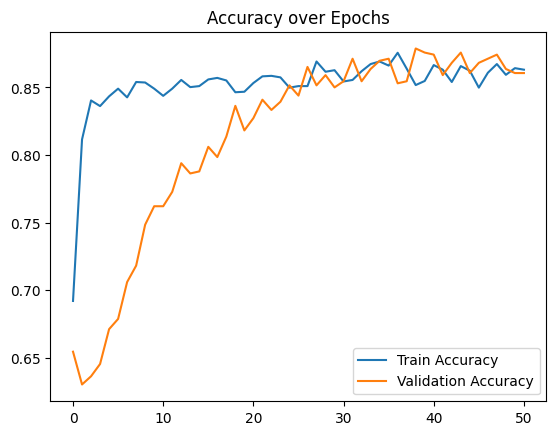

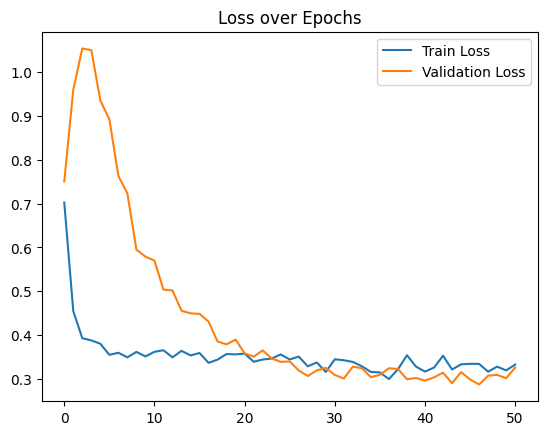

✅ Model loaded from: /content/drive/MyDrive/best_mobilenetv3large_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 654ms/step
Unique y_true: [0 1]
Unique y_pred: [0 1]
Valid labels: [0, 1]
Target names: ['benign', 'malignant']

Predicted sample count per class:
benign: 363
malignant: 297

✅ Overall Validation Accuracy: 85.91%


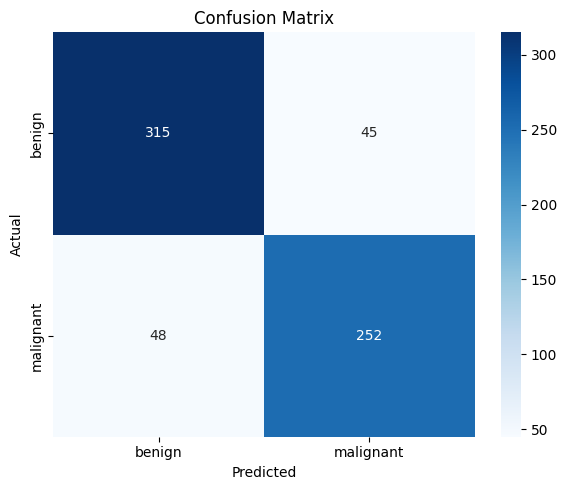


Classification Report:

              precision    recall  f1-score   support

      benign       0.87      0.88      0.87       360
   malignant       0.85      0.84      0.84       300

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.86      0.86      0.86       660



IndexError: index 1 is out of bounds for axis 1 with size 1

In [1]:
# -*- coding: utf-8 -*-
"""MobileNetV3.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1YX65u1w9glAk0nmVr8F2nocjXAFn6axO
"""

from google.colab import drive
drive.mount('/content/drive')

import zipfile, os

zip_path = "/content/drive/MyDrive/d.zip"
extract_path = "/content/dataset"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print(" Dataset extracted.")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

train_dir = "/content/dataset/d/train"
val_dir = "/content/dataset/d/val"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,
    fill_mode='nearest'
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,
    fill_mode='nearest'
)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

base_model = MobileNetV3Large(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze initial layers (adjust index based on MobileNetV3 architecture depth)
for layer in base_model.layers[:150]:  # MobileNetV3Large has ~270 layers
    layer.trainable = False

# Unfreeze later layers for fine-tuning
for layer in base_model.layers[150:]:
    layer.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
output = Dense(2, activation='softmax')(x)  # Number of classes set to 2

model = Model(inputs=base_model.input, outputs=output)

# ----------------------------
# Optimizer: Nadam
# ----------------------------
from tensorflow.keras.optimizers import Nadam

# Configuration (adjust learning_rate if needed)
nadam_lr = 1e-4
optimizer = Nadam(learning_rate=nadam_lr)

# Compile model (loss remains sparse categorical since we use softmax with 2 outputs)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Optional: build the model (only needed if model has not been fit before)
model.build((None, 224, 224, 3))

# Callbacks — updated checkpoint filename
checkpoint = ModelCheckpoint(
    "/content/drive/MyDrive/best_mobilenetv3large_model.keras",  # Updated filename
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=2,
    verbose=1,
    min_lr=1e-6
)

# Fit the model for 51 epochs (no EarlyStopping)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=51,
    callbacks=[checkpoint, lr_scheduler]
)

import matplotlib.pyplot as plt
import os

graph_dir = "/content/drive/MyDrive/diabetic_eye_results"
os.makedirs(graph_dir, exist_ok=True)

# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(); plt.title("Accuracy over Epochs")
plt.savefig(f"{graph_dir}/accuracy_plot.png")
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title("Loss over Epochs")
plt.savefig(f"{graph_dir}/loss_plot.png")
plt.show()

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import load_model

# === Load the trained MobileNetV3Large model ===
model_path = "/content/drive/MyDrive/best_mobilenetv3large_model.keras"  # Updated path
model = load_model(model_path)
print("✅ Model loaded from:", model_path)

# === Directory to save plots ===
graph_dir = "/content/drive/MyDrive/diabetic_eye_results"
os.makedirs(graph_dir, exist_ok=True)

# === Predict on validation data ===
val_data.reset()
pred_probs = model.predict(val_data, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_data.classes

# === Get class mapping ===
class_indices = val_data.class_indices
index_to_label = {v: k for k, v in class_indices.items()}
valid_labels = sorted(index_to_label.keys())
target_names = [index_to_label[i] for i in valid_labels]

# === Debug info ===
print("Unique y_true:", np.unique(y_true))
print("Unique y_pred:", np.unique(y_pred))
print("Valid labels:", valid_labels)
print("Target names:", target_names)

# === Optional: Check class prediction counts ===
print("\nPredicted sample count per class:")
pred_counter = collections.Counter(y_pred)
for label in valid_labels:
    print(f"{index_to_label[label]}: {pred_counter.get(label, 0)}")

# === Accuracy Score ===
accuracy = accuracy_score(y_true, y_pred)
print(f"\n✅ Overall Validation Accuracy: {accuracy * 100:.2f}%")

# === Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred, labels=valid_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig(f"{graph_dir}/confusion_matrix.png")
plt.show()

# === Classification Report ===
print("\nClassification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    labels=valid_labels,
    target_names=target_names,
    zero_division=0  # Prevents warnings when precision is undefined
))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import os

# ---------- Required Inputs ----------
# y_true: true labels (e.g., [0, 1, 1, 0, ...]), shape = (n_samples,)
# pred_probs: predicted probabilities, shape = (n_samples, n_classes)
# labels: class names (optional, replace with your own)
# graph_dir: directory where to save plot

n_classes = 2
labels = [f'Class {i}' for i in range(n_classes)]  # Replace with actual names if needed
graph_dir = "./plots"

# Ensure output directory exists
os.makedirs(graph_dir, exist_ok=True)

# Binarize true labels for ROC computation
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

# Dictionaries to store ROC metrics
fpr, tpr, roc_auc = {}, {}, {}
missing_classes = []

# Compute ROC for each class
for i in range(n_classes):
    if np.sum(y_true_bin[:, i]) == 0:
        print(f"⚠️ Skipping ROC curve for {labels[i]} — no positive samples in y_true.")
        missing_classes.append(labels[i])
        continue
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ---------- Plot ROC Curves ----------
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    if i in roc_auc:
        plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Save and show plot
plot_path = os.path.join(graph_dir, "roc_curve.png")
plt.savefig(plot_path)
plt.show()

# ---------- Summary ----------
if missing_classes:
    print(f"\nSkipped ROC for classes with no positive samples: {', '.join(missing_classes)}")
print(f"✅ ROC curve saved to: {plot_path}")

model.save("/content/drive/MyDrive/final_resnet152_model.keras")
